# Ex 2.2 시계열 데이터를 예측하는 회귀 ANN

1. 회귀 ANN 모델링

In [0]:
from keras import layers, models

In [0]:
class ANN(models.Model):
  def __init__(self, Nin, Nh, Nout):
    #Prepare network layers and activate functions
    hidden = layers.Dense(Nh)
    output = layers.Dense(Nout)
    relu = layers.Activation('relu')
    
    #Connect network elements
    x = layers.Input(shape=(Nin,))
    h = relu(hidden(x))
    y = output(h)
    
    super().__init__(x,y)
    
    self.compile(loss='mse',optimizer='sgd')
    

2. 데이터 불러오기

In [0]:
from keras import datasets
from sklearn import preprocessing
import nbimporter

In [0]:
def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
  scaler = preprocessing.MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return (X_train, y_train),(X_test, y_test)

3. 회귀 ANN 학습결과 그래프 구현

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_loss(history):
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Test'],loc=0)

4. 회귀 ANN 학습 및 성능 분석

In [0]:
def main():
  Nin = 13
  Nh = 5
  Nout = 1
  
  model = ANN(Nin,Nh,Nout)
  (X_train,y_train),(X_test,y_test) = Data_func()
  
  history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
  
  performance_test = model.evaluate(X_test, y_test, batch_size=100)
  print('\nTest Loss -> {:.2f}'.format(performance_test))
  
  plot_loss(history)
  plt.show()
  
  

5. 실행


57344/57026 [==============================] - 0s 4us/step
Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 1s - loss: 490.7654 - val_loss: 118.0998
Epoch 2/100
 - 0s - loss: 101.7355 - val_loss: 84.8857
Epoch 3/100
 - 0s - loss: 80.7012 - val_loss: 70.2537
Epoch 4/100
 - 0s - loss: 64.8579 - val_loss: 71.6705
Epoch 5/100
 - 0s - loss: 56.9253 - val_loss: 53.3526
Epoch 6/100
 - 0s - loss: 56.0277 - val_loss: 59.7435
Epoch 7/100
 - 0s - loss: 75.3962 - val_loss: 49.3529
Epoch 8/100
 - 0s - loss: 46.9912 - val_loss: 88.7519
Epoch 9/100
 - 0s - loss: 61.9077 - val_loss: 61.3118
Epoch 10/100
 - 0s - loss: 45.6545 - val_loss: 51.8330
Epoch 11/100
 - 0s - loss: 41.1096 - val_loss: 43.1451
Epoch 12/100
 - 0s - loss: 38.0744 - val_loss: 37.0719
Epoch 13/100
 - 0s - loss: 35.7294 - val_loss: 53.7336
Epoch 14/100
 - 0s - loss: 43.5031 - val_loss: 41.1703
Epoch 15/100
 - 0s - loss: 44.3071 - val_loss: 48.1746
Epoch 16/100
 - 0s - loss: 35.1284 - val_loss: 52.0698
Epoch 17/100
 - 0s - l

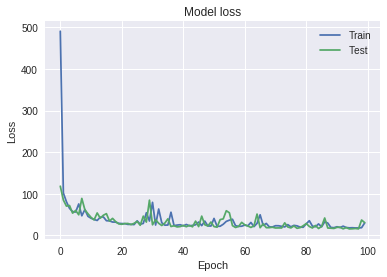

In [47]:
if __name__=='__main__':
  main()